# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [3]:
# Create a settings dictionary with your API key and preferred units
settings = {"APPID": api_key, "units": "metric"}

In [4]:
# Creating new csv with capitalized first letter to match when searching with API call. 
cities_df=pd.DataFrame(cities)
cities_df.columns=['City']
cities_df['City'] = cities_df['City'].str.title() 
cities_df.head()
export_csv = cities_df.to_csv('cities.csv', index= False) 


In [91]:
# read csv
df=pd.read_csv('cities.csv')
len(df)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# empty lists
info = []
city_weather=[]
#counter to keep trak of items requeted
counter=0
#summary for keys
summary= ["name","clouds.all","sys.country","dt",
          "main.humidity","coord.lat","coord.lon",
          "main.temp_max","wind.speed"]
# loop for each city
for each in df['City']:
    try:
        print(f'Retreiving data for '+str(counter+1)+"-"+each)
        current_weather= owm.get_current(each,**settings)
        city_weather.append(current_weather)
    except:
        print(f"{each} not found")
    else:
        data = current_weather(*summary)
        info.append(data)
        counter = counter + 1
    if counter % 59 == 0:
        time.sleep(60)


            
            

Retreiving data for 1Mataura
Retreiving data for 2Carbonia
Retreiving data for 3Abu Kamal
Retreiving data for 4Illoqqortoormiut
Illoqqortoormiut not found
Retreiving data for 4Bambous Virieux
Retreiving data for 5Busselton
Retreiving data for 6Shenjiamen
Retreiving data for 7Castro
Retreiving data for 8Xining
Retreiving data for 9Bethel
Retreiving data for 10Ribeira Grande
Retreiving data for 11Riyadh
Retreiving data for 12Meadow Lake
Retreiving data for 13Eureka
Retreiving data for 14Hithadhoo
Retreiving data for 15Caravelas
Retreiving data for 16Severo-Kurilsk
Retreiving data for 17Bengkulu
Bengkulu not found
Retreiving data for 17Barrow
Retreiving data for 18Goderich
Retreiving data for 19Torbay
Retreiving data for 20Kenmare
Retreiving data for 21Punta Arenas
Retreiving data for 22Ballina
Retreiving data for 23Mar Del Plata
Retreiving data for 24Kodiak
Retreiving data for 25Junction City
Retreiving data for 26Faanui
Retreiving data for 27Canon City
Retreiving data for 28Vostok
Retre

Retreiving data for 221Daru
Retreiving data for 222Holeby
Retreiving data for 223Santa Marta
Retreiving data for 224Porto Walter
Retreiving data for 225Butterworth
Retreiving data for 226La Orilla
Retreiving data for 227Kulevcha
Retreiving data for 228Salamanca
Retreiving data for 229Victoria
Retreiving data for 230Patiya
Retreiving data for 231Dawei
Retreiving data for 232Zachagansk
Zachagansk not found
Retreiving data for 232Kruisfontein
Retreiving data for 233Pandan
Retreiving data for 234Povenets
Retreiving data for 235Linfen
Retreiving data for 236Kamenskoye
Kamenskoye not found
Retreiving data for 236Longyearbyen
Retreiving data for 237Gazojak
Retreiving data for 238Mount Gambier
Retreiving data for 239Balkanabat
Retreiving data for 240Puerto Escondido
Retreiving data for 241Pacific Grove
Retreiving data for 242Tingi
Retreiving data for 243Kimbe
Retreiving data for 244Saint-Philippe
Retreiving data for 245Lensk
Retreiving data for 246Louisbourg
Louisbourg not found
Retreiving dat

Retreiving data for 435Haapiti
Retreiving data for 436Wattegama
Retreiving data for 437Saint-Augustin
Retreiving data for 438Sorland
Retreiving data for 439Kemijarvi
Kemijarvi not found
Retreiving data for 439Mana
Retreiving data for 440Tautira
Retreiving data for 441Vaitupu
Vaitupu not found
Retreiving data for 441Suntar
Retreiving data for 442Muros
Retreiving data for 443San Juan
Retreiving data for 444Mapiripan
Retreiving data for 445Lata
Retreiving data for 446Cam Ranh
Retreiving data for 447Copiapo
Retreiving data for 448Rawlins
Retreiving data for 449Lavrentiya
Retreiving data for 450Soyo
Retreiving data for 451Bereda
Retreiving data for 452Port Blair
Retreiving data for 453Mecca
Retreiving data for 454Bela Vista Do Paraiso
Retreiving data for 455Edd
Retreiving data for 456Byron Bay
Retreiving data for 457Kununurra
Retreiving data for 458Vao
Retreiving data for 459Puerto Suarez
Retreiving data for 460Spearfish
Retreiving data for 461Namie
Retreiving data for 462Roma
Retreiving da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
# info to data farme
weather_df=pd.DataFrame(info)
# rename columns to match info
weather_df.columns=["City","Cloudiness %","Country","Date",
          "Humidity %","Latitude","Longitued",
          "Max Temp (F)","Wind Speed (mph)"]
#converting C to F degrees
weather_df['Max Temp (F)']=(9.0/5.0) * weather_df['Max Temp (F)'] + 32
#print df
weather_df.head()

,City,Cloudiness %,Country,Date,Humidity %,Latitude,Longitued,Max Temp (F),Wind Speed (mph)
0,Mataura,80,NZ,1570085941,89,-46.19,168.86,48.992,1.34
1,Carbonia,20,IT,1570085942,68,39.17,8.53,69.800,4.60
2,Abu Kamal,0,SY,1570085942,58,34.45,40.92,76.010,7.13
3,Bambous Virieux,75,MU,1570085942,88,-20.34,57.76,77.000,5.10
4,Busselton,66,AU,1570085943,33,-33.64,115.35,75.992,3.22


In [80]:
#export df to csv
weather_df.to_csv('Weather_Data.csv',index=False)

In [81]:
#rename df
df1=weather_df


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot
## 1) Most of max temperatures from cities between -40 to 40 degrees latitude are above 60 (F)  and temps. mostly increased the closer the city is to the Equator (at 0 degrees).
## 2) Max temps. in cities in the northern hemisphere (Lat 0 to 90 ) tend to be lower the further north the city is from the Equator. 

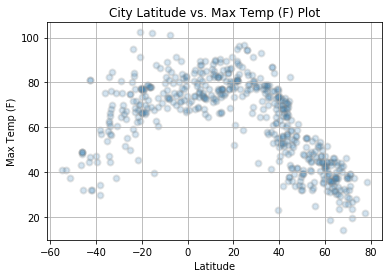

In [93]:
# plot with matplotlib

fig, ax = plt.subplots()
ax.scatter(df1["Latitude"], df1["Max Temp (F)"], cmap="Blues", alpha=0.2, edgecolors="grey", linewidth=2)


#labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("City Latitude vs. Max Temp (F) Plot")
plt.grid()
# save plot
plt.savefig('Lat_Max_temp.png')
plt.show()

#### Latitude vs. Humidity Plot
### 3) A majority of cities had humidity above 40 %.  Humidity do not appear to change much in regards to a city's proximity to the Equator (Lat 0).

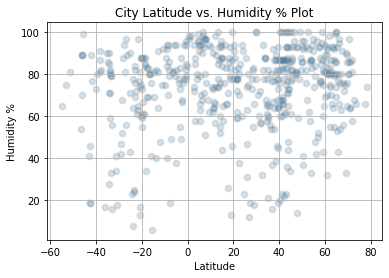

In [94]:
# plot
fig, ax = plt.subplots()
ax.scatter(df1["Latitude"], df1["Humidity %"], cmap="Blues", alpha=0.2, edgecolors="grey", linewidth=2)
#labels
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity % Plot")
plt.grid()
#save
plt.savefig('Lat_Wind_speed.png')

#### Latitude vs. Cloudiness Plot

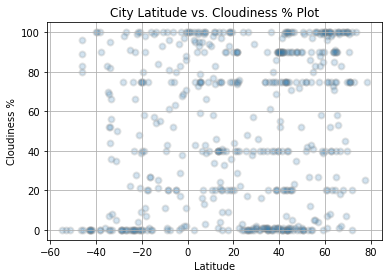

In [95]:
#plot
fig, ax = plt.subplots()
ax.scatter(df1["Latitude"], df1["Cloudiness %"], cmap="Blues", alpha=0.2, edgecolors="grey", linewidth=2)

#labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness % Plot")
plt.grid()
#save
plt.savefig('Lat_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot
## 4) A majority of cities had wind speeds below 7.5 (mph).  Wind speeds do not appear to change in regards to a city's proximity to the Equator (Lat 0) .

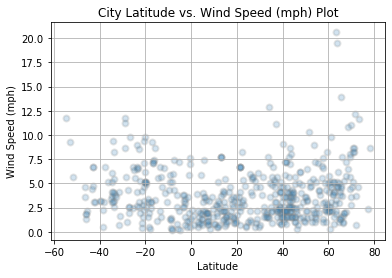

In [96]:
#plot
fig, ax = plt.subplots()
ax.scatter(df1["Latitude"], df1["Wind Speed (mph)"], cmap="Blues", alpha=0.2, edgecolors="grey", linewidth=2)
#labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (mph) Plot")
plt.grid()
#save 
plt.savefig('Lat_Wind.png')
plt.show()
